<a href="https://colab.research.google.com/github/mariam1502/ADHD-Gaming-Environment/blob/Machine-Learning-Models/ADHD_and_Non_ADHD_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2
import tensorflow 
import keras  
import glob 
import keras  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage import io 
import random 
from sklearn.metrics import classification_report, confusion_matrix  
import csv



import matplotlib.pyplot as plt  
%matplotlib inline
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
! pip install -U imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Emotive_df=pd.read_csv('/content/gdrive/MyDrive/Emotive/Emotive.csv', index_col=False)

Emotive_df.head()
Emotive_df.tail()
Emotive_df.count()
Emotive_df['Class'].value_counts()

0    482
1    480
Name: Class, dtype: int64

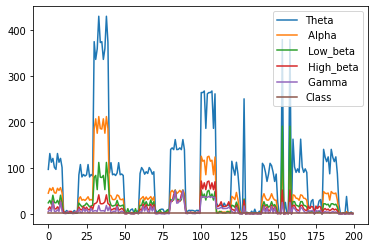

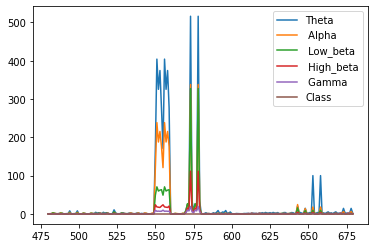

In [ ]:
ADHD_df= Emotive_df[Emotive_df['Class']==1][0:200]
Non_ADHD_df= Emotive_df[Emotive_df['Class']==0][0:200]

ADHD_df.plot()
Non_ADHD_df.plot()

In [ ]:
Emotive_df.dtypes

Theta         float64
 Alpha        float64
 Low_beta     float64
 High_beta    float64
 Gamma        float64
Class           int64
dtype: object

In [ ]:
Emotive_df.columns

Index(['Theta', ' Alpha', ' Low_beta', ' High_beta', ' Gamma ', 'Class'], dtype='object')

In [ ]:
# feature_df=Emotive_df[['Theta', ' Alpha', ' Low_beta', ' High_beta', ' Gamma ']]

# #Independent variables
# #packed 5 colummns out of 6
# x=np.asarray(feature_df)

# #dependent variables
# y=np.asarray(Emotive_df['Class'])

# x[0:5]


In [ ]:
X = Emotive_df.drop(['Class'], axis=1)
y = Emotive_df['Class']

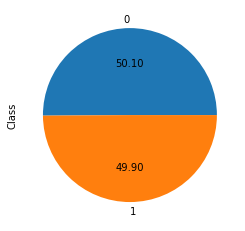

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

Use Random UnderSampler To make dataset balanced

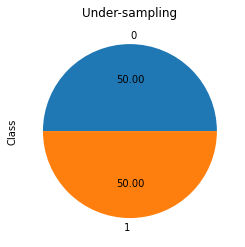

In [ ]:
import sklearn.metrics
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
# Class distribution
y_res.value_counts()

0    480
1    480
Name: Class, dtype: int64

Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=500,stratify=y_res)  #feature , labels 
print('Splitted Successfully')

# model.fit(x_train,y_train)
# print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully


In [ ]:
x_train.shape   #(136008, 5)
y_train.shape   #(136008,)

x_test.shape    #(34002, 5)
y_test.shape    #(34002,)

(192,)

Use SVM Model with RBF Kernel

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[3,0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [ ]:
model.fit(x_train,y_train)
print('The Model is trained well with the given data')
model.best_estimator_

# model.best_params_ contains the best parameters obtained from GridSearchCV

The Model is trained well with the given data


SVC(C=100, gamma=1, probability=True)

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0
 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 1]
The actual data is:
[0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1
 1 0 1 1 1 1 0]
The model is 90.10416666666666% accurate


In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        96
           1       0.90      0.91      0.90        96

    accuracy                           0.90       192
   macro avg       0.90      0.90      0.90       192
weighted avg       0.90      0.90      0.90       192



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred);
cm

array([[86, 10],
       [ 9, 87]])

Text(69.0, 0.5, 'Truth or Actual Value')

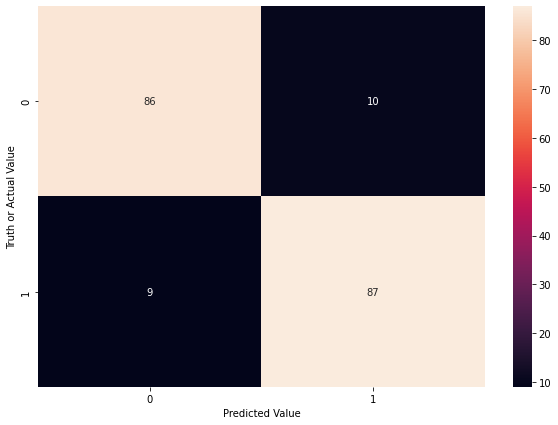

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

Save Model To a File Using Python Pickle

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

Load Saved Model

In [ ]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [ ]:
mp.predict([[0.989564953246,0.447909770091,0.560844323374,0.245818346239,0.173577882882]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])